## <center> Métodos para calcular la derivada numérica <center>

## Derivada hacia adelante: (Error de h^2)
$$f'(x)\simeq \frac{f(x+h)-f(x)}{h}$$
## Derivada hacia atrás:
$$f'(x)\simeq \frac{f(x)-f(x-h)}{h}$$
## Derivada con diferencia central: (resto h^3)
$$f'(x)\simeq \frac{f(x+h)-f(x-h)}{2h}$$

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
def f(x,n,A1=1,A2=1,A=1):#n: nos permitirá movernos entre una función y otra
    if(n==1):
        return A1/x**6-A2/x**12
    elif(n==2):
        return A*np.cos(x)
labels={1:'A1/x**6-A2/x**12',2:'A*np.cos(x)'}

In [14]:
def derivada_adelante(x,n,h):
    return (f(x+h,n)-f(x,n))/h
def derivada_atrás(x,n,h):
    return (f(x,n)-f(x-h,n))/h
def derivada_central(x,n,h):
    return (f(x+h,n)-f(x-h,n))/(2*h)

Gráficas para h=1e-06
          f1(x)  f'1adelante(x)   f'1atrás(x)  f'1central(x)
0 -9.999990e+11    1.199921e+14  1.200077e+14   1.199999e+14
1 -3.519950e+11    3.871718e+13  3.872179e+13   3.871949e+13
2 -1.347072e+11    1.367723e+13  1.367873e+13   1.367798e+13
3 -5.535718e+10    5.219136e+12  5.219669e+12   5.219402e+12
4 -2.418880e+10    2.128520e+12  2.128723e+12   2.128621e+12
5 -1.114983e+10    9.198244e+11  9.199066e+11   9.198655e+11
6 -5.386656e+09    4.182433e+11  4.182784e+11   4.182609e+11
7 -2.712900e+09    1.989400e+11  1.989558e+11   1.989479e+11
8 -1.417939e+09    9.850703e+10  9.851445e+10   9.851074e+10
9 -7.661902e+08    5.056766e+10  5.057127e+10   5.056947e+10
      f2(x)  f'2adelante(x)   f'2atrás(x)  f'2central(x)
0  1.000000   -5.000445e-07  5.000445e-07       0.000000
1  0.994903   -1.008389e-01 -1.008379e-01      -0.100838
2  0.979663   -2.006493e-01 -2.006484e-01      -0.200649
3  0.954437   -2.984143e-01 -2.984133e-01      -0.298414
4  0.919480   -3.93137

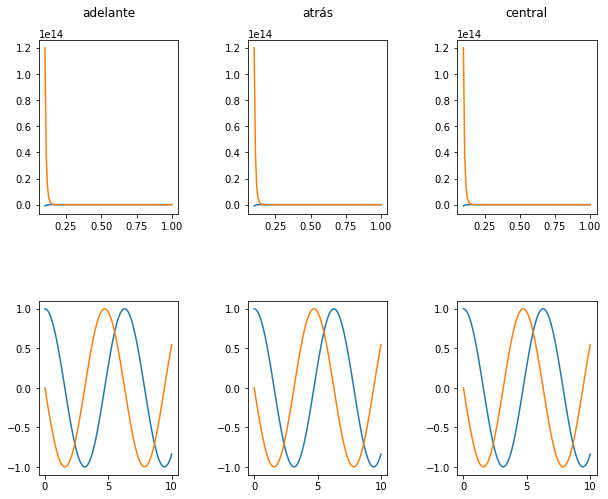

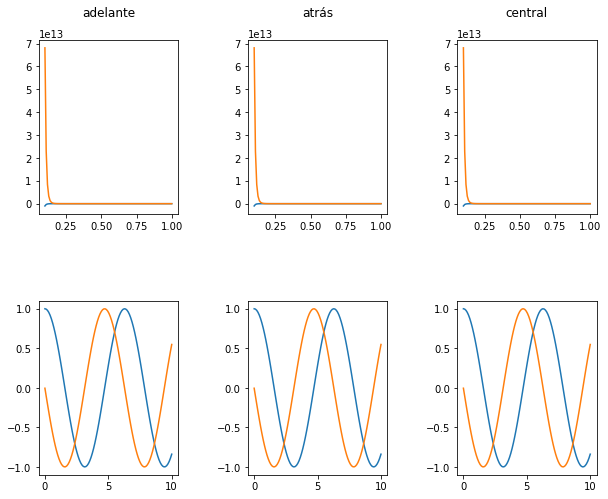

In [15]:
hs=[1e-6,0.01]
labels2={0:'adelante',1:'atrás',2:'central'}
for h in hs:
    print(f"Gráficas para h={h}")
    fig,ax=plt.subplots(2,3,sharex=False,sharey=False,
                        gridspec_kw={'hspace':0.5, 'wspace': 0.5},figsize=(10,8))
    for n in [1,2]:
        x= np.linspace(0.1,1,100) if n==1 else np.linspace(0.0,10,100) # 100 puntos entre 0.01 y 1
        df1=derivada_adelante(x,n,h)
        df2=derivada_atrás(x,n,h)
        df3=derivada_central(x,n,h)
        datos = {f'f{n}(x)': f(x,n), f'f\'{n}adelante(x)': df1
        , f'f\'{n}atrás(x)': df2
        , f'f\'{n}central(x)': df3}
        datos = pd.DataFrame(data=datos)
        for i in range(3):
            ax[0][i].set_title(f"{labels2[i]}",x=.5/1.,y=1.1/1.,loc="center")
            ax[n-1][i].plot(x,f(x,n),label=f"{labels[n]}")
            ax[n-1][i].plot(x,df1)
        print(datos[:10])
    plt.savefig(f"derivadas_h={h}.png")

# <center> Método de Newton <center>
$$f(x^{*})=0$$
Escogemos un punto inicial $x_0$ tal que:
$$x^{*}=x_0+h$$
Entonces:
$$f(x^*)=f(x_0+h)\simeq f(x_0)+f'(x_0)h$$
Despejamos $h$ teniendo en cuenta que $f(r)=0$:
$$h=-\frac{f(x_0)}{f'(x_0)}$$
Hallamos $x^{*}$ en términos de $x_0$ y h:

$$x^{*}=x_0+h\simeq x_0-\frac{f(x_0)}{f'(x_0)}$$
En realidad el término derecho es una aproximación de la raíz $x^{*}$, a esta la llamamos $x_1$:
$$x_{1}=x_0-\frac{f(x_0)}{f'(x_0)}$$
Ahora tomamos $x_{1}$ para hallar una mejor:
$$x_{2}= x_1-\frac{f(x_1)}{f'(x_1)}$$
y así sucesivamente ($n$ veces):
$$x_{n+1}=x_{n}-\frac{f(x_{n})}{f'(x_{n})}$$

In [16]:
def fp(x,n,A1=1,A2=1,A=1):
    if(n==1):
        return -6*A1/x**7+12*A2/x**13
    if(n==2):
        return -A*np.sin(x)

In [17]:
def fpp(x,n,A1=1,A2=1,A=1):
    if(n==1):
        return np.longdouble(6*7*A1/x**8-12*13*A2/x**14)
    if(n==2):
        return -A*np.cos(x)

## Con la derivada analítica

In [18]:
def Newton_anal(x0,n,error):
    xant=x0
    xsig=xant-fp(xant,n)/fpp(xant,n)
    while(np.abs(xsig-xant)>error):
        xant=xsig
        xsig=xant-fp(xant,n)/fpp(xant,n)
#         print(fp(xant,n),fpp(xant,n),xant,xsig)
    return xsig

In [19]:
error=1e-12
for n in [1,2]:
    print(f"\nExtremos para {labels[n]}:")
    print("x*")
    if(n==1):
        seed=0.5
        print("{0:9f}".format(Newton_anal(seed,n,error)))
    elif(n==2):
        seed=np.array([-0.5,2,6,9])
        for x0 in seed:
            print("{0:9f}".format(Newton_anal(x0,n,error)))


Extremos para A1/x**6-A2/x**12:
x*
 1.122462

Extremos para A*np.cos(x):
x*
 0.000000
 3.141593
 6.283185
 9.424778


## Con la derivada Numérica

In [20]:
def Newton_num(x0,n,error):
    xant=x0
    h=error/100
    diff_f=derivada_adelante(xant,n,h)
    diff_2_f=(derivada_adelante(xant+h,n,h)-diff_f)/h
    xsig=xant-diff_f/diff_2_f
    cnt=0
    while(np.abs(xsig-xant)>error):
        xant=xsig
        diff_f=derivada_adelante(xant,n,h)
        diff_2_f=(derivada_adelante(xant+h,n,h)-diff_f)/h
        xsig=xant-diff_f/diff_2_f
#         print(fp(xant,n),fpp(xant,n),xant,xsig)
        cnt+=1
        if(cnt>1000):
            print("Supera 1000 iteraciones")
            break
    return xsig

In [21]:
error=1e-4
for n in [1,2]:
    print(f"\nExtremos para {labels[n]}:")
    print("x*")
    if(n==1):
        seed=0.5
        print("{0:9f}".format(Newton_num(seed,n,error)))
    elif(n==2):
        seed=np.array([-0.5,2,6,9])
        for x0 in seed:
            print("{0:9f}".format(Newton_num(x0,n,error)))


Extremos para A1/x**6-A2/x**12:
x*
 1.122462

Extremos para A*np.cos(x):
x*
-0.000000
 3.141592
 6.283185
 9.424777


## Anexo: Comparación gráfica entre la derivada analítica y la de derivada hacia adelante

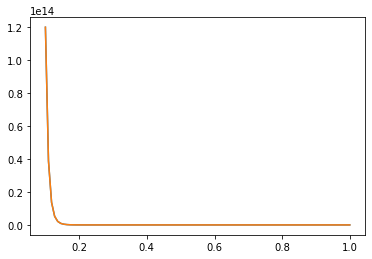

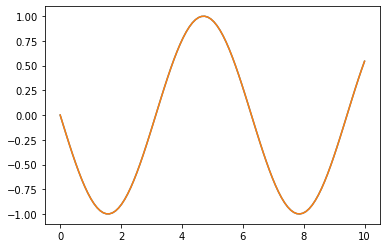

In [22]:
h=1e-6#0.01
for n in [1,2]:
    x= np.linspace(0.1,1,100) if n==1 else np.linspace(0.0,10,100) # 100 puntos entre 0.01 y 1
    df1=derivada_adelante(x,n,h)
    plt.figure()
    plt.plot(x,df1)
    plt.plot(x,fp(x,n))